In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon,skewnorm
import seaborn as sns
import scipy.stats as stats

In [2]:
def get_data(n):
    exponential_distribution = expon.rvs(scale=1,size=n//2)
    skewed_normal_distribution = skewnorm.rvs(a=5,loc=3,size=n//2)
    data = np.concatenate([exponential_distribution,skewed_normal_distribution])
    np.random.shuffle(data)
    return data
    

In [3]:
population = get_data(5000)

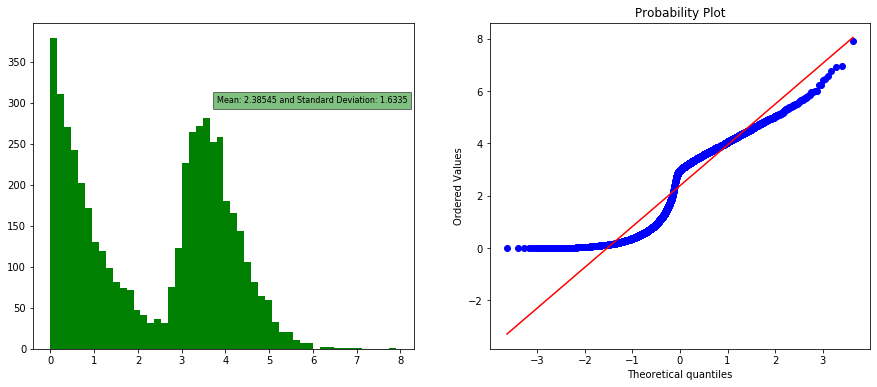

In [4]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.hist(population,bins=50,color='g')
plt.text(3.8,300,'Mean: {} and Standard Deviation: {}'.format(round(population.mean(),5),round(population.std(),5)),fontsize=8,bbox=dict(facecolor='green', alpha=0.5))
plt.subplot(1, 2, 2)
stats.probplot(population, dist="norm", plot=plt)
plt.show()

#sns.distplot(population,kde = False,bins=100,color='g')

In [5]:
population_mean = population.mean()
population_std = population.std()

In [6]:
population_mean = round(population_mean,5)
population_std = round(population_std,5)
print('Population mean: {} and Population Standard Deviation: {}'.format(population_mean,population_std))

Population mean: 2.38545 and Population Standard Deviation: 1.6335


In [7]:
def plot_sampling_mean_distribution(sample_size,sampling_mean_distribution,μ_x_bar,σ_x_bar):
        plt.figure(figsize=(15,6))
        plt.subplot(1, 2, 1)
        plt.hist(sampling_mean_distribution,bins=50,color='r')
        plt.text(3.5,60,'Mean: {} and Standard Deviation: {}'.format(μ_x_bar,σ_x_bar),fontsize=8,bbox=dict(facecolor='red', alpha=0.5))
        plt.text(3.5,50,'Sample Size: {}'.format(sample_size),fontsize=12,bbox=dict(facecolor='red', alpha=0.5))
        plt.xlim((1,7))
        plt.ylim((0,90))
        plt.subplot(1, 2, 2)
        stats.probplot(sampling_mean_distribution, dist="norm", plot=plt)
        plt.show()

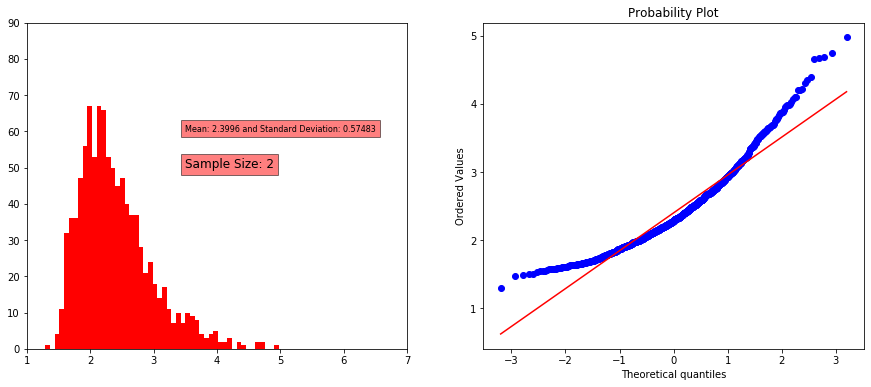

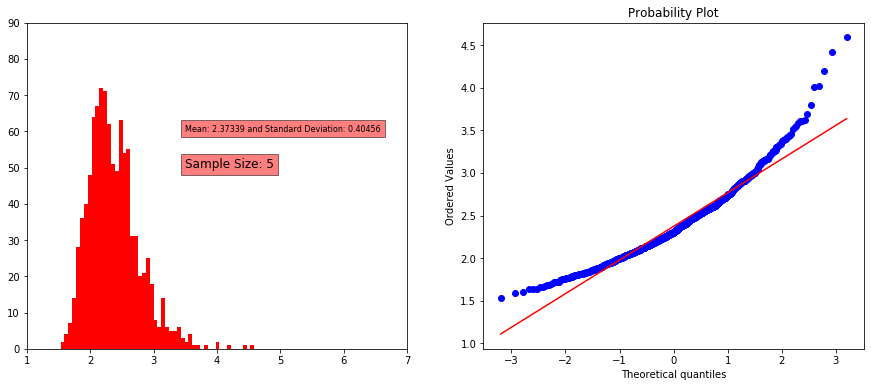

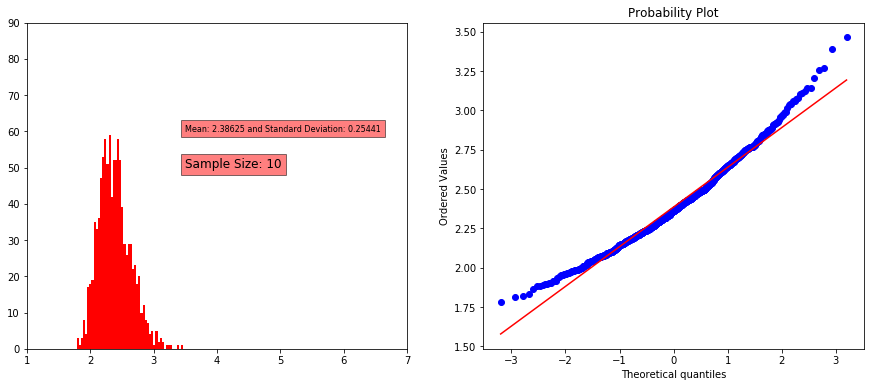

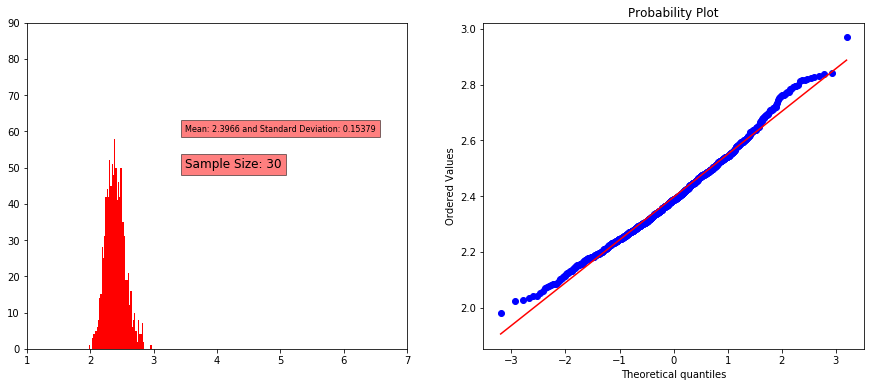

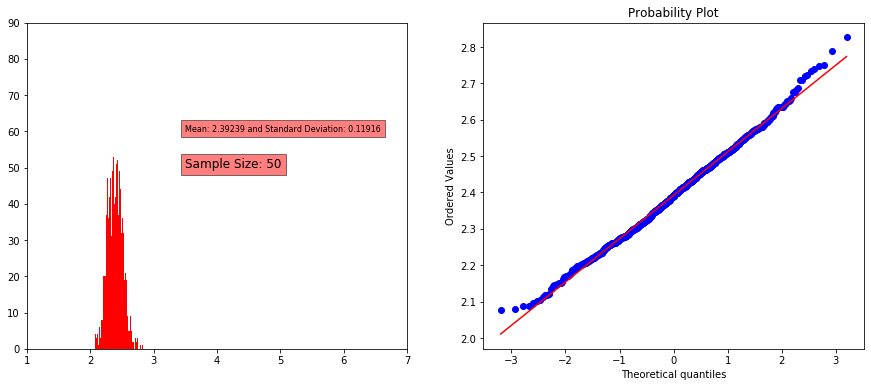

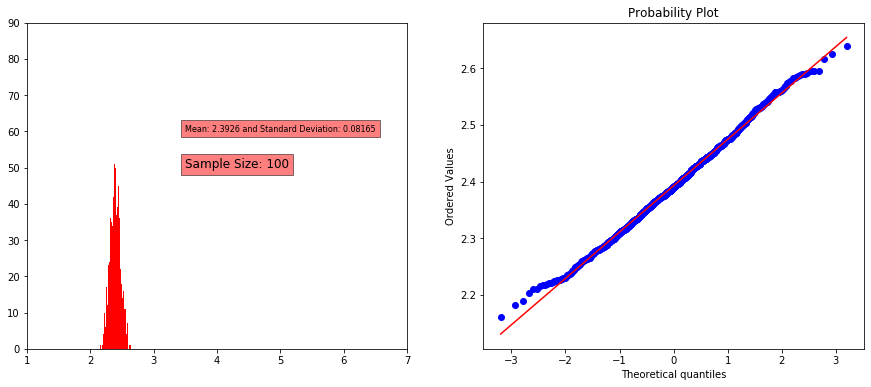

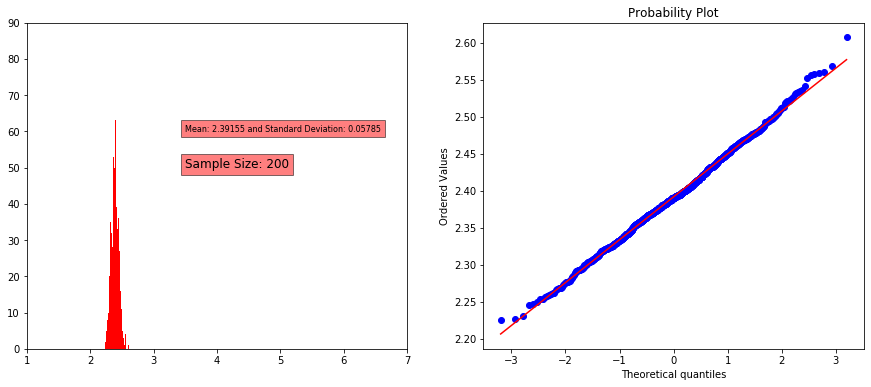

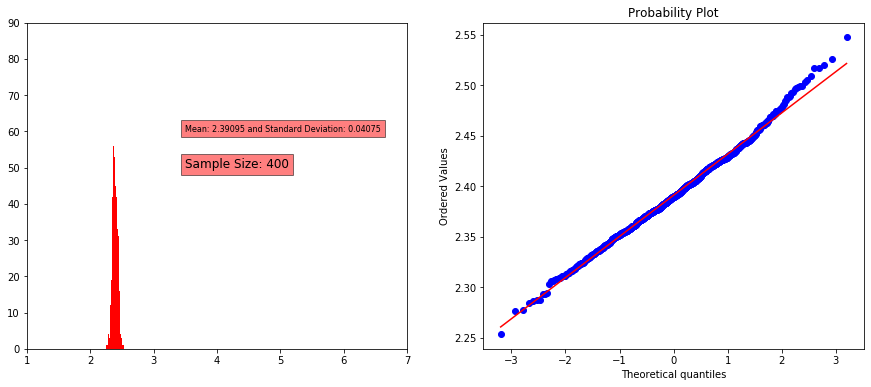

In [8]:
sample_sizes=[2,5,10,30,50,100,200,400]
standard_deviations = []
for sample_size in sample_sizes:
    sampling_mean_distribution = [get_data(sample_size).mean() for _ in range(1000)]
    
    μ_x_bar = np.mean(sampling_mean_distribution)
    σ_x_bar = np.std(sampling_mean_distribution)
    standard_deviations.append(σ_x_bar)
    
    plot_sampling_mean_distribution(sample_size,sampling_mean_distribution,round(μ_x_bar,5),round(σ_x_bar,5))

In [9]:
#Let's Take Sample Size=30 and make inference about the population mean from sample

#Let's pretend we don't know mean and standard deviation of the population
μ = population_mean
σ = population_std 
# Take sample size=30
n=30

# get the sampling mean distribution from 1000 samples each of size = 30
sampling_mean_distribution = [get_data(n).mean() for _ in range(1000)]

# Calculate the mean of sampling mean distribution
μ_x_bar = np.mean(sampling_mean_distribution)
# Calculate the standard deviation of sampling mean distribution
σ_x_bar = np.std(sampling_mean_distribution)


print("Mean of Sampling mean distribution (μ_x_bar): {}".format(round(μ_x_bar,5)))
print('Standard Deviation of Sampling mean distribution (σ_x_bar): {}'.format(round(σ_x_bar,5)))
print('Population mean (μ) : {}'.format(μ))

Mean of Sampling mean distribution (μ_x_bar): 2.38887
Standard Deviation of Sampling mean distribution (σ_x_bar): 0.14984
Population mean (μ) : 2.38545


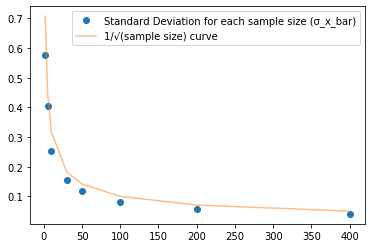

In [10]:
plt.plot(sample_sizes,standard_deviations,'o',label='Standard Deviation for each sample size (σ_x_bar)')
plt.plot(sample_sizes,1/np.sqrt(sample_sizes),alpha=0.5,label='1/√(sample size) curve')
plt.legend(loc='upper right')